In [1]:
#Libs install
!pip install rdflib pydotplus graphviz kglab

In [2]:
#imports
import rdflib
from rdflib import Graph, Namespace
from rdflib.namespace import RDF, FOAF, RDFS, XSD
from rdflib import URIRef, BNode, Literal

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
import kglab

In [3]:
#Creating graph
g = Graph()

turtletriples = """\
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX owl:	<http://www.w3.org/2002/07/owl#>
PREFIX wd: <https://www.wikidata.org/wiki/>
BASE <http://elden-wiki.com/games/>
PREFIX bosses: <http://elden-wiki.com/bosses/>
PREFIX locations: <http://elden-wiki.com/locations/>
PREFIX weapons: <http://elden-wiki.com/items/weapons>
PREFIX equipment: <http://elden-wiki.com/items/equipment>
PREFIX gro: <http://elden-wiki.com/ontology/>
PREFIX prop: <http://elden-wiki.com/property/>


<Elden_Ring>  rdf:type dbo:Video_Game ;
                prop:price "47.99"^^xsd:double ;
                prop:mc-score "94"^^xsd:integer ;
                prop:link-wd wd:Q64826862 ;
                prop:link-steam <https://store.steampowered.com/app/1245620/ELDEN_RING/> ;
                prop:link-mc <https://www.metacritic.com/game/elden-ring/?ftag=MCD-06-10aaa1f> ;
                prop:recent-reviews "Very Positive" ;
                prop:all-reviews "Very Positive" ;
                dbo:releaseDate "2022-02-24"^^xsd:date ;
                dbo:genre dbr:Action_role-playing_game ;
                rdfs:label "Elden Ring"@en ;
                prop:developed_by dbr:From_Sofware ;
                prop:has_boss bosses:boss_01, bosses:boss_02,
                              bosses:boss_03, bosses:boss_04,
                              bosses:boss_05, bosses:boss_06 ;
                prop:has_locations locations:loc_01, locations:loc_02,
                              locations:loc_03, locations:loc_04,
                              locations:loc_05, locations:loc_06 .

# locations
locations:loc_01  rdfs:type gro:Location ;
                  rdfs:label "Stormveil Castle" ;
                  prop:recommended_level "30"^^xsd:integer .

locations:loc_02  rdfs:type gro:Location ;
                  rdfs:label "Raya Lucaria Academy" ;
                  prop:recommended_level "50"^^xsd:integer .

locations:loc_03  rdfs:type gro:Location ;
                  rdfs:label "Caelid" ;
                  prop:recommended_level "60"^^xsd:integer .

locations:loc_04  rdfs:type gro:Location ;
                  rdfs:label "Leyndell, Royal Capital" ;
                  prop:recommended_level "60"^^xsd:integer .

locations:loc_05  rdfs:type gro:Location ;
                  rdfs:label "Elphael, Brace of the Haligtree" ;
                  prop:recommended_level "110"^^xsd:integer .

locations:loc_06  rdfs:type gro:Location ;
                  rdfs:label "Leyndell, Ashen Capital" ;
                  prop:recommended_level "95"^^xsd:integer .

# end locations

# bosses
bosses:boss_01  rdf:type gro:Boss ;
                rdfs:label "Godrick"@en ;
                prop:fantasy_name "Godrick the grafted" ;
                prop:located_in locations:loc_01 ;
                prop:has_strenghts "Magic", "Fire", "Lightning" ;
                prop:hp "6080"^^xsd:integer ;
                prop:defense "105"^^xsd:integer ;
                prop:stance "105"^^xsd:integer ;
                prop:souls_dropped "20000"^^xsd:integer ;
                prop:parryable: "false"^^xsd:boolean .
bosses:boss_02  rdf:type gro:Boss ;
                rdfs:label "Rennala"@en ;
                prop:fantasy_name "Rennala, queen of the full moon" ;
                prop:located_in locations:loc_02 ;
                prop:has_strenghts "Magic", "Fire", "Lightning" ;
                prop:has_weakness "Slash" ;
                prop:hp "3493"^^xsd:integer ;
                prop:defense "109"^^xsd:integer ;
                prop:stance "0"^^xsd:integer ;
                prop:souls_dropped "40000"^^xsd:integer ;
                prop:parryable: "false"^^xsd:boolean .
bosses:boss_03  rdf:type gro:Boss ;
                rdfs:label "Starscourge"@en ;
                prop:fantasy_name "Starscourge radahn" ;
                prop:located_in locations:loc_03 ;
                prop:has_strenghts "Holy" ;
                prop:has_weakness "Pierce" ;
                prop:hp "9572"^^xsd:integer ;
                prop:defense "113"^^xsd:integer ;
                prop:stance "200"^^xsd:integer ;
                prop:souls_dropped "70000"^^xsd:integer ;
                prop:parryable: "false"^^xsd:boolean .
bosses:boss_04  rdf:type gro:Boss ;
                rdfs:label "Morgott"@en ;
                prop:fantasy_name "Morgott the omen king" ;
                prop:located_in locations:loc_04 ;
                prop:has_strenghts "Holy" ;
                prop:has_weakness "Slash" ;
                prop:hp "10399"^^xsd:integer ;
                prop:defense "114"^^xsd:integer ;
                prop:stance "80"^^xsd:integer ;
                prop:souls_dropped "120000"^^xsd:integer ;
                prop:parryable: "true"^^xsd:boolean .
bosses:boss_05  rdf:type gro:Boss ;
                rdfs:label "Malenia"@en ;
                prop:fantasy_name "Malenia blade of miquella" ;
                prop:located_in locations:loc_05 ;
                prop:has_strenghts "Physical" ;
                prop:hp "33251"^^xsd:integer ;
                prop:defense "200"^^xsd:integer ;
                prop:stance "80"^^xsd:integer ;
                prop:souls_dropped "480000"^^xsd:integer ;
                prop:parryable: "true"^^xsd:boolean .
bosses:boss_06  rdf:type gro:Boss ;
                rdfs:label "Godfrey"@en ;
                prop:fantasy_name "Godfrey, first elden lord" ;
                prop:located_in locations:loc_06 ;
                prop:has_strenghts "Physical" ;
                prop:hp "21903"^^xsd:integer ;
                prop:defense "120"^^xsd:integer ;
                prop:stance "120"^^xsd:integer ;
                prop:souls_dropped "300000"^^xsd:integer ;
                prop:parryable: "false"^^xsd:boolean .

#ontologies
gro:Boss  rdf:type  owl:Class ;
          rdfs:label "Boss"@en ;
          rdfs:comment "A boss is a strong enemy that is usually faced in a final section of a specific location. It usually drops valuable items" .

gro:Location  rdf:type owl:Class ;
              rdfs:label "Location"@en ;
              rdfs:comment "Location in the world map" .

"""

In [4]:
g.parse(data=turtletriples, format="turtle")

<Graph identifier=N7e96f2d0986f48fb9b9dc08736aa13a1 (<class 'rdflib.graph.Graph'>)>

In [5]:
#print all triples
for s, p, o in g:
   print((s, p, o))

(rdflib.term.URIRef('http://elden-wiki.com/bosses/boss_02'), rdflib.term.URIRef('http://elden-wiki.com/property/has_weakness'), rdflib.term.Literal('Slash'))
(rdflib.term.URIRef('http://elden-wiki.com/bosses/boss_02'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://elden-wiki.com/ontology/Boss'))
(rdflib.term.URIRef('http://elden-wiki.com/games/Elden_Ring'), rdflib.term.URIRef('http://dbpedia.org/ontology/releaseDate'), rdflib.term.Literal('2022-02-24', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date')))
(rdflib.term.URIRef('http://elden-wiki.com/bosses/boss_02'), rdflib.term.URIRef('http://elden-wiki.com/property/hp'), rdflib.term.Literal('3493', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))
(rdflib.term.URIRef('http://elden-wiki.com/locations/loc_04'), rdflib.term.URIRef('http://elden-wiki.com/property/recommended_level'), rdflib.term.Literal('60', datatype=rdflib.term.URIRef('http://www

In [6]:
#Save the graph in ttl
g.serialize(destination="elden-wiki-rdflib-ttl.ttl", format="turtle")

#Save the graph in trig
g.serialize(destination="elden-wiki-rdflib-trig.trig", format="trig")

<Graph identifier=N7e96f2d0986f48fb9b9dc08736aa13a1 (<class 'rdflib.graph.Graph'>)>

In [13]:
#query with sparql

query = """
SELECT ?name_boss
WHERE {
    ?s a gro:Boss ;
    prop:fantasy_name ?name_boss ;
    prop:located_in ?loc .
    ?loc rdfs:label ?label_loc .
    FILTER(?label_loc = "Raya Lucaria Academy")
}"""

qres = g.query(query)
for row in qres:
    print(f"Boss in Raya Lucaria Academy is: - {row.name_boss} -")

Boss in Raya Lucaria Academy is: - Rennala, queen of the full moon -


In [7]:
# Helper function for visualizing RDF graphs
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

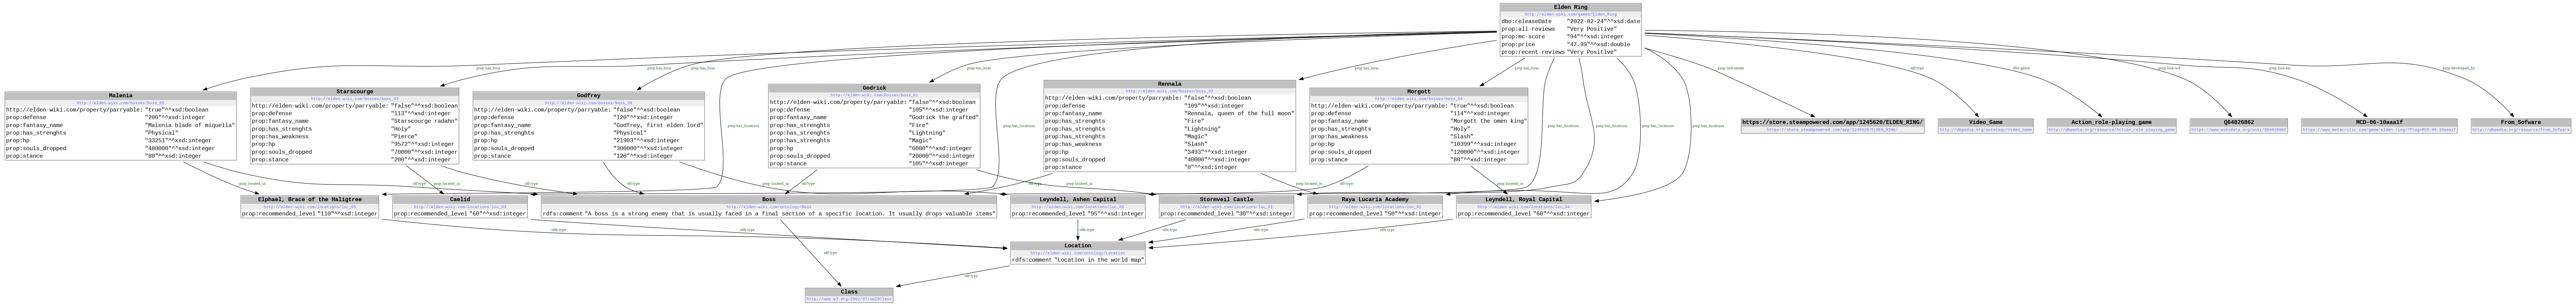

In [8]:
visualize(g)